In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data frame with tab separator
titanic_train = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv",
                           sep='\t')   
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [5]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Whatever column int & float we will get basic statistics
# Count - will tell how many rows , ages only have 126- remaining are null values.
# Mean - Avg/Mean values of each column - Example age age is 28.14
# Std - standard deviation of each column- Variance
# Min - min values in each column
# 25 % - Arrange the data ascending order. Then  25th percentail record - The below example 2,50th percentil is  4.
# Actual dataset - 25th Percentail of age is 19. 75th paercentil is 35.
# The differnce b/w min to 75 percentile is 117.25 - 1 = 116.
# The maximum number in the each column example: age is 71
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


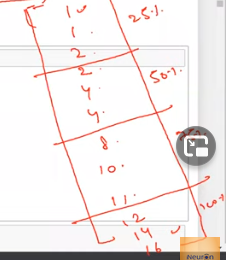

In [7]:
# Including object column
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,156.000000,156.000000,156.000000,156,156,126.000000,156.000000,156.000000,156,156.000000,31,155
unique,NaN,NaN,NaN,156,2,NaN,NaN,NaN,145,NaN,28,3
top,NaN,NaN,NaN,"Fynney, Mr. Joseph J",male,NaN,NaN,NaN,237736,NaN,D26,S
freq,NaN,NaN,NaN,1,100,NaN,NaN,NaN,2,NaN,2,110
mean,78.500000,0.346154,2.423077,NaN,NaN,28.141508,0.615385,0.397436,NaN,28.109587,NaN,NaN
std,45.177428,0.477275,0.795459,NaN,NaN,14.613880,1.056235,0.870146,NaN,39.401047,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.830000,0.000000,0.000000,NaN,6.750000,NaN,NaN
25%,39.750000,0.000000,2.000000,NaN,NaN,19.000000,0.000000,0.000000,NaN,8.003150,NaN,NaN
50%,78.500000,0.000000,3.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,117.250000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,30.371850,NaN,NaN


In [8]:
#Filter object columns
titanic_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,156,156,156,31,155
unique,156,2,145,28,3
top,"Fynney, Mr. Joseph J",male,237736,D26,S
freq,1,100,2,2,110


In [9]:
# Filter the objet column- manual method
titanic_train.dtypes == "object"

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
# Filter the object using boolen indexinging
titanic_train.dtypes[titanic_train.dtypes == "object"]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [11]:
# data type
print(type(titanic_train.dtypes[titanic_train.dtypes == "object"]))

<class 'pandas.core.series.Series'>


In [12]:
# It will provide the index list series
titanic_train.dtypes[titanic_train.dtypes == "object"].index

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
print(type(titanic_train.dtypes[titanic_train.dtypes == "object"].index))
# Now we are gettin index list- we can pass & filter

<class 'pandas.core.indexes.base.Index'>


In [14]:
#anaylis the single column staticsrtics
titanic_train['Fare'].describe()

count    156.000000
mean      28.109587
std       39.401047
min        6.750000
25%        8.003150
50%       14.454200
75%       30.371850
max      263.000000
Name: Fare, dtype: float64

In [15]:
#anaylis the multiple column staticsrtics
titanic_train[['Fare','Age']].describe()

,Fare,Age
count,156.000000,126.000000
mean,28.109587,28.141508
std,39.401047,14.613880
min,6.750000,0.830000
25%,8.003150,19.000000
50%,14.454200,26.000000
75%,30.371850,35.000000
max,263.000000,71.000000


In [16]:
# Filter the object data & get count ,uniques, top & freqncy - using boolen
# From the below data we can see ticket & cabin data are missing values
# Top - whos name in the data ,fare,
# How many time the top data present.
titanic_train.dtypes == "object"
a = titanic_train.dtypes[titanic_train.dtypes == "object"].index
a
titanic_train[a].describe()


,Name,Sex,Ticket,Cabin,Embarked
count,156,156,156,31,155
unique,156,2,145,28,3
top,"Fynney, Mr. Joseph J",male,237736,D26,S
freq,1,100,2,2,110


In [17]:
list_col = titanic_train.dtypes[titanic_train.dtypes == "object"].index
titanic_train[list_col].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,156,156,156,31,155
unique,156,2,145,28,3
top,"Fynney, Mr. Joseph J",male,237736,D26,S
freq,1,100,2,2,110


In [18]:
# Home work - Extartc the folat data
float_list = titanic_train.dtypes[titanic_train.dtypes == "float64"].index
titanic_train[float_list].describe()

,Age,Fare
count,126.000000,156.000000
mean,28.141508,28.109587
std,14.613880,39.401047
min,0.830000,6.750000
25%,19.000000,8.003150
50%,26.000000,14.454200
75%,35.000000,30.371850
max,71.000000,263.000000


In [19]:
# Filter required columns
titanic_train[['Name','Sex','Age']].head()

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


In [20]:
#Data selection
titanic_train[['Name','Sex','Age']][10:15] # 10th to 15th recoord

,Name,Sex,Age
10,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,"Bonnell, Miss. Elizabeth",female,58.0
12,"Saundercock, Mr. William Henry",male,20.0
13,"Andersson, Mr. Anders Johan",male,39.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0


In [21]:
titanic_train[['Name','Sex','Age']][10:20:2] # Even number

,Name,Sex,Age
10,"Sandstrom, Miss. Marguerite Rut",female,4.0
12,"Saundercock, Mr. William Henry",male,20.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
16,"Rice, Master. Eugene",male,2.0
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0


In [22]:
sorted(titanic_train["Name"])[5:10:2]# sorted object & Even number

['Andersson, Mr. August Edvard ("Wennerstrom")',
 'Andrew, Mr. Edgardo Samuel',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)']

In [23]:
sorted(titanic_train["Fare"])[5:10:2]# sorted object & Even number

[7.225, 7.2292, 7.25]

In [24]:
# Home work
# Load the data, filter int data & store into datframe& Filter one column & sort the column & fetct few data
titanic_train.dtypes=='int64'
int_data = titanic_train.dtypes[titanic_train.dtypes=='int64'].index
print("Int Type data",int_data)
int_data_df = titanic_train[int_data]
int_data_df.head()

Int Type data Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')


,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0


In [25]:
int_data_df['SibSp'][100:105]

100    0
101    0
102    0
103    0
104    2
Name: SibSp, dtype: int64

In [26]:
sorted(int_data_df['SibSp'][100:105])

[0, 0, 0, 0, 2]

In [27]:
# Store the even age rows only ,store into data frame & sort
age_data = titanic_train['Age'][::2]
b = pd.DataFrame(age_data)   
c = b.sort_values(by ='Age')
c.head(5)

,Age
78,0.83
16,2.00
10,4.00
58,5.00
50,7.00


In [28]:
# Adding additional column with same data
titanic_train["sudh"]="sdffs"
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sudh
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,sdffs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,sdffs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,sdffs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,sdffs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,sdffs


In [29]:
titanic_train["Cabin"][0:15]       # Check the first 15 tickets

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [30]:
titanic_train["Cabin"].unique()# Check number of unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2'], dtype=object)

In [31]:
# Check columns
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'sudh'],
      dtype='object')

#### How to map cetrain columns

In [32]:
titanic_train["Pclass"].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [33]:
# Usecase 1
# How to get the categorical unique data info & convert as one,two,three like that oridinal
# Watch advanced EDA part - use label encoder
# Pd categorical give how many categories avaliable,type  & category value list
new_Pclass = pd.Categorical(titanic_train["Pclass"])
new_Pclass

[3, 1, 3, 1, 3, ..., 1, 3, 3, 3, 1]
Length: 156
Categories (3, int64): [1, 2, 3]

In [34]:
# usecase 2
# Need to extact the first letter of each unique type & store into new columns
# Example here we can see Cabin A - High class people

In [35]:
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2'], dtype=object)

In [36]:
import numpy as np 
char_cabin = titanic_train["Cabin"].astype(str) # Convert data to str
# list comperhensive operation
# Extartc the first letter & store in list
new_Cabin = [cabin[0] for cabin in char_cabin] # Take first letter
# How many category avaliable
new_Cabin = pd.Categorical(new_Cabin)
#new_Cabin
new_Cabin


[n, C, n, C, n, ..., C, n, n, n, n]
Length: 156
Categories (8, object): [A, B, C, D, E, F, G, n]

In [37]:
# New columns;
# titanic_train["new_Cabin"] = new_Cabin
# titanic_train.head()

In [38]:
# overwrite the existing data with new mapped data
titanic_train["Cabin"] = new_Cabin
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sudh
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S,sdffs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,sdffs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,sdffs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,sdffs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,sdffs


#### Extract the null value.

In [39]:
# usecase 3 : Extarct the null values index

In [40]:
titanic_train['Age'].describe()

count    126.000000
mean      28.141508
std       14.613880
min        0.830000
25%       19.000000
50%       26.000000
75%       35.000000
max       71.000000
Name: Age, dtype: float64

In [41]:
titanic_train["Age"].isnull()[0:5]

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [42]:
# How many null value
titanic_train["Age"].isnull().sum()

30

In [43]:
# get the null value index method 1
titanic_train[titanic_train["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
             48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
            126, 128, 140, 154],
           dtype='int64')

In [44]:
# # get the null value index method 2
missing = np.where(titanic_train["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154], dtype=int64),)

In [45]:
# use case 4 : who paid more fare

In [46]:
# Extarct the max fare row 
np.where(titanic_train["Fare"]==max(titanic_train["Fare"]))

(array([27, 88], dtype=int64),)

In [47]:
# Filter 
titanic_train.iloc[np.where(titanic_train["Fare"]==max(titanic_train["Fare"]))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sudh
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C,S,sdffs
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C,S,sdffs


In [48]:
# extarct name & age only who paid more
row_index = np.where(titanic_train["Fare"]==max(titanic_train["Fare"]))

In [49]:
titanic_train.iloc[row_index][['Name','Age']]

,Name,Age
27,"Fortune, Mr. Charles Alexander",19.0
88,"Fortune, Miss. Mabel Helen",23.0


In [50]:
# use case 5 : who is the min aged person & cabin

In [51]:
titanic_train.iloc[np.where(titanic_train["Age"]==min(titanic_train["Age"]))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sudh
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0,n,S,sdffs


In [52]:
titanic_train.iloc[np.where(titanic_train["Age"]==min(titanic_train["Age"]))][['Name','Cabin']]

,Name,Cabin
78,"Caldwell, Master. Alden Gates",n


-  Three type of row filtering
-  .iloc - integer based location
-  .loc - label based
-  .idx = index

In [53]:
# Use case 6 : who is the biggest family strength
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sudh
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S,sdffs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,sdffs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,sdffs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,sdffs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,sdffs


In [54]:
# Add two column values (concate) & find the biggest family
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]
titanic_train["Family"]
most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))
most_family

(array([59, 71], dtype=int64),)

In [55]:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))
most_family
titanic_train.iloc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sudh,Family
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,n,S,sdffs,7
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,n,S,sdffs,7


### Convert list,dict to Series or Data frame

In [56]:
import numpy as np
import pandas as pd

labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)
d = {'a':10,'b':20,'c':30}

print ("Labels:", labels)
print("My data:", my_data)
print("Dictionary:", d)
pd.Series(my_data)

Labels: ['a', 'b', 'c']
My data: [10, 20, 30]
Dictionary: {'a': 10, 'b': 20, 'c': 30}


0    10
1    20
2    30
dtype: int64

In [57]:
# Series with own lable index ( named index)
se= pd.Series(my_data, index=labels)
se

a    10
b    20
c    30
dtype: int64

In [58]:
# But still the systemm remember the defaulted index.
se.index
se[0] # Still we can give index as 0 & get the values

10

In [59]:
print ("\nHolding numerical data\n",'-'*25, sep='')
print(pd.Series(arr)[1])



Holding numerical data
-------------------------
20


In [60]:
print ("\nHolding text labels\n",'-'*20, sep='')
print(pd.Series(labels))



Holding text labels
--------------------
0    a
1    b
2    c
dtype: object


In [61]:
# Dict to pandas dataFrame
d = {'a':"kjhk",'b':20,'c':30}
d.items
# Pass the key to index - Replicate how much index given
pd.DataFrame(d,index = ['a','b','c'])

,a,b,c
a,kjhk,20,30
b,kjhk,20,30
c,kjhk,20,30


In [62]:
print ("\nHolding objects from a dictionary\n",'-'*40, sep='')
print(pd.Series([type, sum, max]))


Holding objects from a dictionary
----------------------------------------
0             <class 'type'>
1    <built-in function sum>
2    <built-in function max>
dtype: object


In [63]:
# named index with int
ser1 = pd.Series([1,2,3,4],index = [2,4,6,8])
# name index with string
ser2 = pd.Series([1,2,5,4],['CA', 'OR', 'NV', 'AZ'])
ser1

2    1
4    2
6    3
8    4
dtype: int64

In [64]:
ser2

CA    1
OR    2
NV    5
AZ    4
dtype: int64

In [65]:
ser1[2]
# if we give 
# ser[0] - will give error

1

<b> If we give named index as int - default index value will forgot  <b>

In [66]:
print ("\nIndexing by number (positional value in the series)\n",'-'*52, sep='')
print("Value for CA in ser2:", ser2[0])
print("Value for AZ in ser2:", ser2[3])
print("Value for NV in ser2:", ser2[2])
ser2


Indexing by number (positional value in the series)
----------------------------------------------------
Value for CA in ser2: 1
Value for AZ in ser2: 4
Value for NV in ser2: 5


CA    1
OR    2
NV    5
AZ    4
dtype: int64

In [67]:
# Extract multiple values from series
ser1[0:3:2]


2    1
6    3
dtype: int64

In [68]:
print ("\nIndexing by a range\n",'-'*25, sep='')
print ("Value for OR, CO, and AZ in ser1:\n", ser1[0:3:2], sep='')


Indexing by a range
-------------------------
Value for OR, CO, and AZ in ser1:
2    1
6    3
dtype: int64


In [69]:
# Can cat the two series
# if both index match - arthmetic addtion
# otherwise NaN
# CA + CA = first 1+1 = 2 & 1+4 = 5

In [70]:
ser1 = pd.Series([1,2,3,4],['CA', 'OR', 'CO', 'CA'])
ser2 = pd.Series([1,2,5,4],['CA', 'NV', 'AZ','OR'])
ser3 = ser1+ser2
ser3

AZ    NaN
CA    2.0
CA    5.0
CO    NaN
NV    NaN
OR    6.0
dtype: float64

In [71]:
print ("\nAfter adding the two series, the result looks like this...\n",'-'*59, sep='')
print(ser3)
print("\nPython tries to add values where it finds common index name, and puts NaN where indices are missing\n")



After adding the two series, the result looks like this...
-----------------------------------------------------------
AZ    NaN
CA    2.0
CA    5.0
CO    NaN
NV    NaN
OR    6.0
dtype: float64

Python tries to add values where it finds common index name, and puts NaN where indices are missing



In [72]:
print ("\nThe idea works even for multiplication...\n",'-'*43, sep='')
print (ser1*ser2)



The idea works even for multiplication...
-------------------------------------------
AZ    NaN
CA    1.0
CA    4.0
CO    NaN
NV    NaN
OR    8.0
dtype: float64


In [73]:
# Duplicate index
# named index with int
ser1 = pd.Series([1,2,3,4],index = [2,2,3,4])
ser1

2    1
2    2
3    3
4    4
dtype: int64

In [74]:
# we will get all dusplicate values
ser1[2]

2    1
2    2
dtype: int64

In [75]:
# The number of data should be equal index
# Second param automatically consider as index
ser1 = pd.Series([1,2,3,4],['a','b','c','d'])
ser1

a    1
b    2
c    3
d    4
dtype: int64

<h1><center>DAY4</center></h1>

In [76]:
#randomoules will genrate the random number
# Seed will help same random number
# E.g if I will seed as (1) & other person also give same seed,both will get same values of random numbers.
# Here we are converting multidimentional array into pandas dataframe.

In [77]:
# Multi dimentional - with custom index & header
from numpy.random import randn as rn
#np.random.seed(101)
matrix_data = rn(5,4)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(matrix_data,row_labels,column_headings)
#print("\nThe data frame looks like\n",'-'*45, sep='')
df

,W,X,Y,Z
A,0.688585,0.857189,-0.184338,-1.509215
B,0.533637,1.382158,-0.177599,-0.088496
C,-1.069339,0.064885,-0.618631,1.094624
D,1.436316,-0.975415,0.719302,-1.459577
E,-3.592768,0.402232,1.805687,-0.700167


In [78]:
# Extratc the data single colum,multi column
df['X']

A    0.857189
B    1.382158
C    0.064885
D   -0.975415
E    0.402232
Name: X, dtype: float64

In [79]:
df[['X','Y']]

,X,Y
A,0.857189,-0.184338
B,1.382158,-0.177599
C,0.064885,-0.618631
D,-0.975415,0.719302
E,0.402232,1.805687


In [80]:
# Etratct the row using Named index or lable based
df.loc['E']

W   -3.592768
X    0.402232
Y    1.805687
Z   -0.700167
Name: E, dtype: float64

In [81]:
# Suppouse I need to extact with default index- we need to use interger based location
df.iloc[4]

W   -3.592768
X    0.402232
Y    1.805687
Z   -0.700167
Name: E, dtype: float64

In [82]:
# if we see  both output are same only difference is location(lable based) & integer based

 <b> Suppouse I change the row index I have changed what will happen ?? 
    Always consider as default index<b>

In [83]:
# Multi dimentional - with custom index & header
from numpy.random import randn as rn
#np.random.seed(101)
matrix_data = rn(5,4)
# Five rows & 4 columns
row_labels = [20,30,40,50,60]
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(matrix_data,row_labels,column_headings)
#print("\nThe data frame looks like\n",'-'*45, sep='')
df

,W,X,Y,Z
20,1.095612,-0.354368,-0.378478,0.718201
30,-0.657930,-0.701422,0.982680,0.471456
40,0.020632,0.941483,0.617178,-2.108659
50,1.697068,-0.573569,-1.210275,-0.050271
60,0.510387,-0.499569,-0.912347,0.666203


In [84]:
# If I try to accece with default index - we will get required values
df.iloc[4]

W    0.510387
X   -0.499569
Y   -0.912347
Z    0.666203
Name: 60, dtype: float64

<b> iloc always remember default index. <b>

In [85]:
# But we give named index it won't work - even we can see interger based location
# iloc always remember default index.

# df.iloc[20]

In [86]:
# If I give same index number for row & extarct?
from numpy.random import randn as rn
#np.random.seed(101)
matrix_data = rn(5,4)
# Five rows & 4 columns
row_labels = [20,30,40,40,60]
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(matrix_data,row_labels,column_headings)
#print("\nThe data frame looks like\n",'-'*45, sep='')
df

,W,X,Y,Z
20,1.304815,-1.052343,0.571227,0.133403
30,-1.841335,1.317079,-1.194408,0.214028
40,1.193453,-1.739189,-0.086470,-0.181867
40,1.568749,-0.280717,-1.564008,1.277020
60,-0.419213,-0.477070,-1.574606,-0.284690


In [87]:
# Extratc the duplicated rows 
# Will list both rows
df.loc[40]

,W,X,Y,Z
40,1.193453,-1.739189,-0.086470,-0.181867
40,1.568749,-0.280717,-1.564008,1.277020


In [88]:
# Even though named indexs(40) are duplicate  - Using loc we can extarct with all duplicate - Using iloc we can extarct the default
# row index value. Dependeds on  the usecase we can use. System should not be duplicate
df.iloc[3]

W    1.568749
X   -0.280717
Y   -1.564008
Z    1.277020
Name: 40, dtype: float64

In [89]:
# Extarct the intersection of data
df.iloc[1:3,2:4]

,Y,Z
30,-1.194408,0.214028
40,-0.086470,-0.181867


In [90]:
# Extratc the data another way - mention the default index inside the list,custom order.
# Here will return 1,4,2 second rows
df.iloc[[1,4,2]]

,W,X,Y,Z
30,-1.841335,1.317079,-1.194408,0.214028
60,-0.419213,-0.477070,-1.574606,-0.284690
40,1.193453,-1.739189,-0.086470,-0.181867


In [91]:
# Filtering specific column order,
df.iloc[[1,4,2],[3,1]]

,Z,X
30,0.214028,1.317079
60,-0.284690,-0.477070
40,-0.181867,-1.739189


In [92]:
# Home work
df.iloc[[1,2],[1,2]]

,X,Y
30,1.317079,-1.194408
40,-1.739189,-0.086470


In [93]:
# Same data with named index & label
df.loc[[30,40],['X','Y']]

,X,Y
30,1.317079,-1.194408
40,-1.739189,-0.086470
40,-0.280717,-1.564008


In [94]:
df

,W,X,Y,Z
20,1.304815,-1.052343,0.571227,0.133403
30,-1.841335,1.317079,-1.194408,0.214028
40,1.193453,-1.739189,-0.086470,-0.181867
40,1.568749,-0.280717,-1.564008,1.277020
60,-0.419213,-0.477070,-1.574606,-0.284690


In [95]:
# Get the corner data
df.iloc[[0,4],[0,3]]

,W,Z
20,1.304815,0.133403
60,-0.419213,-0.284690


In [96]:
# using negative index
df.iloc[[0,-1],[0,-1]]

,W,Z
20,1.304815,0.133403
60,-0.419213,-0.284690


In [97]:
# If I give same index number for row & extarct?
from numpy.random import randn as rn
#np.random.seed(101)
matrix_data = rn(5,4)
# Five rows & 4 columns
row_labels = [10,20,30,40,50]
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(matrix_data,row_labels,column_headings)
#print("\nThe data frame looks like\n",'-'*45, sep='')
df

,W,X,Y,Z
10,-1.666238,1.073894,0.225541,-1.585060
20,-0.890575,1.037676,-0.179834,0.616824
30,0.651740,-0.762847,1.146945,-1.274964
40,0.527418,-0.081201,-0.228313,-0.410028
50,0.952665,-0.390946,-1.356802,0.724585


In [98]:
# Without giving Named Label data using range
df.loc[10:30,'W':'Y']

,W,X,Y
10,-1.666238,1.073894,0.225541
20,-0.890575,1.037676,-0.179834
30,0.651740,-0.762847,1.146945


In [99]:
print("\nType of the pair of columns: ", type(df[['X','Z']]), sep='')
print ("\nSo, for more than one column, the object turns into a DataFrame")


Type of the pair of columns: <class 'pandas.core.frame.DataFrame'>

So, for more than one column, the object turns into a DataFrame


In [100]:
print("\nThe 'X' column accessed by DOT method (NOT recommended)\n",'-'*55, sep='')
print(df["X"])


The 'X' column accessed by DOT method (NOT recommended)
-------------------------------------------------------
10    1.073894
20    1.037676
30   -0.762847
40   -0.081201
50   -0.390946
Name: X, dtype: float64


In [101]:
# with print
print("\nA column is created by assigning it in relation to an existing column\n",'-'*75, sep='')
df['New'] = df['X']+df['Z']
df['New (Sum of X and Z)'] = df['X']+df['Z']
print(df)



A column is created by assigning it in relation to an existing column
---------------------------------------------------------------------------
           W         X         Y         Z       New  New (Sum of X and Z)
10 -1.666238  1.073894  0.225541 -1.585060 -0.511166             -0.511166
20 -0.890575  1.037676 -0.179834  0.616824  1.654501              1.654501
30  0.651740 -0.762847  1.146945 -1.274964 -2.037812             -2.037812
40  0.527418 -0.081201 -0.228313 -0.410028 -0.491228             -0.491228
50  0.952665 -0.390946 -1.356802  0.724585  0.333639              0.333639


In [102]:
df

,W,X,Y,Z,New,New (Sum of X and Z)
10,-1.666238,1.073894,0.225541,-1.585060,-0.511166,-0.511166
20,-0.890575,1.037676,-0.179834,0.616824,1.654501,1.654501
30,0.651740,-0.762847,1.146945,-1.274964,-2.037812,-2.037812
40,0.527418,-0.081201,-0.228313,-0.410028,-0.491228,-0.491228
50,0.952665,-0.390946,-1.356802,0.724585,0.333639,0.333639


#### Drop the row or column
##### Drop will only with Named index ( will not default index)

In [103]:
# If I give X will not drop ( will give error, becasue the system will confused whether I need to drop 
# Row or Column - So always we need to give axis info 0 means row
# suppouse if one of row has index then will drop. Now we need to mention axis =1 then will drop column)
# Paramently need to drop use inplace  True
print("\nX column is dropped by using df.drop() method\n",'-'*55, sep=' ')
#df.drop("X",inplace=True) # Notice the axis=1 option, axis = 0 is default, so one has to change it to 1
df.drop("X",axis = 1,inplace=True)


X column is dropped by using df.drop() method
 -------------------------------------------------------


In [104]:
# We can see X removed
df

,W,Y,Z,New,New (Sum of X and Z)
10,-1.666238,0.225541,-1.585060,-0.511166,-0.511166
20,-0.890575,-0.179834,0.616824,1.654501,1.654501
30,0.651740,1.146945,-1.274964,-2.037812,-2.037812
40,0.527418,-0.228313,-0.410028,-0.491228,-0.491228
50,0.952665,-1.356802,0.724585,0.333639,0.333639


In [105]:
# Drop the row of 40 & assign to df1
df1=df.drop(40)
print("\nA row (index) is dropped by using df.drop() method and axis=0\n",'-'*65, sep='')
print(df1)



A row (index) is dropped by using df.drop() method and axis=0
-----------------------------------------------------------------
           W         Y         Z       New  New (Sum of X and Z)
10 -1.666238  0.225541 -1.585060 -0.511166             -0.511166
20 -0.890575 -0.179834  0.616824  1.654501              1.654501
30  0.651740  1.146945 -1.274964 -2.037812             -2.037812
50  0.952665 -1.356802  0.724585  0.333639              0.333639


In [106]:
# drop New (Sum of X and Z) colum
print("\nAn in-place change can be done by making inplace=True in the drop method\n",'-'*75, sep='')
df.drop('New (Sum of X and Z)', axis=1, inplace=True)
print(df)


An in-place change can be done by making inplace=True in the drop method
---------------------------------------------------------------------------
           W         Y         Z       New
10 -1.666238  0.225541 -1.585060 -0.511166
20 -0.890575 -0.179834  0.616824  1.654501
30  0.651740  1.146945 -1.274964 -2.037812
40  0.527418 -0.228313 -0.410028 -0.491228
50  0.952665 -1.356802  0.724585  0.333639


In [107]:
## IX - Some where combnination of loc & iloc
df.ix[0:2,1:3]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Y,Z


In [108]:
# Change the index
df.index = ['A','B','C','D','E']

In [109]:
### Selecting/indexing Rows
#* Label-based 'loc' method
#* Index (numeric) 'iloc' method
df

,W,Y,Z,New
A,-1.666238,0.225541,-1.585060,-0.511166
B,-0.890575,-0.179834,0.616824,1.654501
C,0.651740,1.146945,-1.274964,-2.037812
D,0.527418,-0.228313,-0.410028,-0.491228
E,0.952665,-1.356802,0.724585,0.333639


In [110]:
print("\nLabel-based 'loc' method can be used for selecting row(s)\n",'-'*60, sep='')
print("\nSingle row\n")
print(df.iloc[3])



Label-based 'loc' method can be used for selecting row(s)
------------------------------------------------------------

Single row

W      0.527418
Y     -0.228313
Z     -0.410028
New   -0.491228
Name: D, dtype: float64


In [111]:
print("\nMultiple rows\n")
print(df.loc[['B','C']])


Multiple rows

          W         Y         Z       New
B -0.890575 -0.179834  0.616824  1.654501
C  0.651740  1.146945 -1.274964 -2.037812


In [112]:
print("\nIndex position based 'iloc' method can be used for selecting row(s)\n",'-'*70, sep='')
print("\nSingle row\n")
print(df.iloc[2])



Index position based 'iloc' method can be used for selecting row(s)
----------------------------------------------------------------------

Single row

W      0.651740
Y      1.146945
Z     -1.274964
New   -2.037812
Name: C, dtype: float64


In [113]:
print("\nMultiple rows\n")
print(df.iloc[[1,2]])


Multiple rows

          W         Y         Z       New
B -0.890575 -0.179834  0.616824  1.654501
C  0.651740  1.146945 -1.274964 -2.037812


In [114]:
#### Subsetting DataFrame

In [115]:

matrix_data = rn(5,4)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']
df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)



In [116]:
print("\nThe DatFrame\n",'-'*45, sep='')
print(df)



The DatFrame
---------------------------------------------
          W         X         Y         Z
A  0.077158 -0.290207 -0.762118  0.552489
B  0.349837 -1.507159 -0.388636  0.663227
C -1.549491 -0.750381 -1.145431  1.548174
D -0.079907  0.333889 -0.397030  0.980330
E  1.089192  0.676894  0.289108 -0.259644


In [117]:
print("\nElement at row 'B' and column 'Y' is\n") 
print(df.loc[['B','C'],['Y','W']])



Element at row 'B' and column 'Y' is

          Y         W
B -0.388636  0.349837
C -1.145431 -1.549491


In [118]:
print("\nSubset comprising of rows B and D, and columns W and Y, is\n")
df.iloc[[1,2,3],[0,1]]


Subset comprising of rows B and D, and columns W and Y, is



,W,X
B,0.349837,-1.507159
C,-1.549491,-0.750381
D,-0.079907,0.333889


### without give column explict

In [119]:
print(df.loc[['B','C'],])

          W         X         Y         Z
B  0.349837 -1.507159 -0.388636  0.663227
C -1.549491 -0.750381 -1.145431  1.548174


### Conditonal filtering data extraction

In [120]:
print("\nThe DataFrame\n",'-'*45, sep='')
print(df)



The DataFrame
---------------------------------------------
          W         X         Y         Z
A  0.077158 -0.290207 -0.762118  0.552489
B  0.349837 -1.507159 -0.388636  0.663227
C -1.549491 -0.750381 -1.145431  1.548174
D -0.079907  0.333889 -0.397030  0.980330
E  1.089192  0.676894  0.289108 -0.259644


In [121]:
# boolen filter for entire data frame
print("\nBoolean DataFrame(s) where we are checking if the values are greater than 0\n",'-'*75, sep='')
print(df>0)



Boolean DataFrame(s) where we are checking if the values are greater than 0
---------------------------------------------------------------------------
       W      X      Y      Z
A   True  False  False   True
B   True  False  False   True
C  False  False  False   True
D  False   True  False   True
E   True   True   True  False


In [122]:
# Filter with specific column
print("\n")
print(df.loc[['A','B','C']]>0)




       W      X      Y     Z
A   True  False  False  True
B   True  False  False  True
C  False  False  False  True


In [123]:
booldf = df>0
print("\nDataFrame indexed by boolean dataframe\n",'-'*45, sep='')
print(df[booldf])


DataFrame indexed by boolean dataframe
---------------------------------------------
          W         X         Y         Z
A  0.077158       NaN       NaN  0.552489
B  0.349837       NaN       NaN  0.663227
C       NaN       NaN       NaN  1.548174
D       NaN  0.333889       NaN  0.980330
E  1.089192  0.676894  0.289108       NaN


In [124]:
# Create the matrix data
import pandas as pd 
import numpy as np
matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')
row_labels = ['A','B','C','D','E']
column_headings = ['Age', 'Height', 'Weight']
matrix_data

matrix([[ 22,  66, 140],
        [ 42,  70, 148],
        [ 30,  62, 125],
        [ 35,  68, 160],
        [ 25,  62, 152]])

In [125]:
df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print("\nA new DataFrame\n",'-'*25, sep='')
print(df)



A new DataFrame
-------------------------
   Age  Height  Weight
A   22      66     140
B   42      70     148
C   30      62     125
D   35      68     160
E   25      62     152


In [126]:
# Filter greater than 65
df[df['Height']>65]

,Age,Height,Weight
A,22,66,140
B,42,70,148
D,35,68,160


In [127]:
print("\nRows with Height< 65 inch\n",'-'*35, sep='')
df[df['Height']<65]



Rows with Height< 65 inch
-----------------------------------


,Age,Height,Weight
C,30,62,125
E,25,62,152


In [128]:
booldf1 = df['Height']>65
booldf2 = df['Weight']>145


In [129]:
print("\nRows with Height > 65 inch and Weight >145 lbs\n",'-'*55, sep='')
print(df[(booldf1) & (booldf2)])



Rows with Height > 65 inch and Weight >145 lbs
-------------------------------------------------------
   Age  Height  Weight
B   42      70     148
D   35      68     160


In [130]:
print("\nDataFrame with only Age and Weight columns whose Height > 65 inch\n",'-'*68, sep='')
print(df[booldf1][['Age','Weight']])


DataFrame with only Age and Weight columns whose Height > 65 inch
--------------------------------------------------------------------
   Age  Weight
A   22     140
B   42     148
D   35     160


In [131]:
# Home work
age_value = df['Age']>30
Height_value = df['Height']>65
Weight_value = df['Weight']>125
df[(age_value) & (Height_value) & (Weight_value)]

,Age,Height,Weight
B,42,70,148
D,35,68,160


In [132]:

matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')
row_labels = ['A','B','C','D','E']
column_headings = ['Age', 'Height', 'Weight']


In [133]:
df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print("\nThe DataFrame\n",'-'*25, sep='')
print(df)



The DataFrame
-------------------------
   Age  Height  Weight
A   22      66     140
B   42      70     148
C   30      62     125
D   35      68     160
E   25      62     152


In [134]:
# Reset index-to default- But still old index will be diplay
print("\nAfter resetting index\n",'-'*35, sep='')
print(df.reset_index())



After resetting index
-----------------------------------
  index  Age  Height  Weight
0     A   22      66     140
1     B   42      70     148
2     C   30      62     125
3     D   35      68     160
4     E   25      62     152


In [135]:
# Use drop parameter
print("\nAfter resetting index with 'drop' option TRUE\n",'-'*45, sep='')
print(df.reset_index(drop=True))



After resetting index with 'drop' option TRUE
---------------------------------------------
   Age  Height  Weight
0   22      66     140
1   42      70     148
2   30      62     125
3   35      68     160
4   25      62     152


In [136]:
# Set the index from text

In [137]:
"Student Teacher Engineer Doctor Nurse".split()

['Student', 'Teacher', 'Engineer', 'Doctor', 'Nurse']

In [138]:
print("\nAdding a new column 'Profession'\n",'-'*45, sep='')
df['Profession'] = "Student Teacher Engineer Doctor Nurse".split()
print(df)



Adding a new column 'Profession'
---------------------------------------------
   Age  Height  Weight Profession
A   22      66     140    Student
B   42      70     148    Teacher
C   30      62     125   Engineer
D   35      68     160     Doctor
E   25      62     152      Nurse


In [139]:
# use set index 
print("\nSetting 'Profession' column as index\n",'-'*45, sep='')
print (df.set_index('Profession'))


Setting 'Profession' column as index
---------------------------------------------
            Age  Height  Weight
Profession                     
Student      22      66     140
Teacher      42      70     148
Engineer     30      62     125
Doctor       35      68     160
Nurse        25      62     152


### multi-indexing

In [140]:
#multi-indexing
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))


In [141]:
# Zip will map 0,0,1,1  & create the tuple of list
print("\nTuple pairs after the zip and list command\n",'-'*45, sep='')
print(hier_index)



Tuple pairs after the zip and list command
---------------------------------------------
[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]


In [142]:
# Call the Pd.MultiIndex inbuilt & pass the mapped data
hier_index = pd.MultiIndex.from_tuples(hier_index)
print("\nIndex hierarchy\n",'-'*25, sep='')
print(hier_index)




Index hierarchy
-------------------------
MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])


In [143]:
# Type we can see the multiindex
print("\nIndex hierarchy type\n",'-'*25, sep='')
print(type(hier_index))



Index hierarchy type
-------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>


In [144]:
# Here G1 is outside row & 1,2,3  - inside index
print("\nCreating DataFrame with multi-index\n",'-'*37, sep='')
#np.random.seed(101)
df1 = pd.DataFrame(data=np.round(rn(6,3)), index= hier_index, columns= ['A','B','C'])
print(df1)



Creating DataFrame with multi-index
-------------------------------------
        A    B    C
G1 1  1.0 -1.0 -1.0
   2  1.0  0.0  1.0
   3 -3.0  1.0  0.0
G2 1  1.0 -0.0 -1.0
   2 -0.0  1.0  0.0
   3  1.0 -1.0 -1.0


In [145]:
# Use loc & access single row
df1.loc['G1']

,A,B,C
1,1.0,-1.0,-1.0
2,1.0,0.0,1.0
3,-3.0,1.0,0.0


### Multiple loc statement

In [146]:
# How to access second row data alone
df1.loc['G1'].loc[2,]

A    1.0
B    0.0
C    1.0
Name: 2, dtype: float64

In [147]:
# How to access the -0.0
df1.loc['G1'].loc[2,'B']

0.0

In [148]:
#How to access the -0.0 & 0.0
df1.loc['G1'].loc[2,['B','C']]

B    0.0
C    1.0
Name: 2, dtype: float64

In [149]:
# Combine & iloc
df1.loc['G1'].iloc[2,[2,2]]

C    0.0
C    0.0
Name: 3, dtype: float64

In [150]:
# Home work
# Create the multi index 
l1 = ['A','A','A','B','B','B','C','C','C']
l2 = [1,2,3,1,2,3,1,2,3]
l3 = [1,2,3,4,5,6,7,8,9]
index_formatting = list(zip(l1,l2,l3))
index_formatting

[('A', 1, 1),
 ('A', 2, 2),
 ('A', 3, 3),
 ('B', 1, 4),
 ('B', 2, 5),
 ('B', 3, 6),
 ('C', 1, 7),
 ('C', 2, 8),
 ('C', 3, 9)]

In [151]:
index_test = pd.MultiIndex.from_tuples(index_formatting)

In [152]:
np.random.seed(101)
df1 = pd.DataFrame(data=np.round(rn(9,4)), index= index_test,columns=['S','T','W','X'])
df1

S    T    W    X
A 1 1  3.0  1.0  1.0  1.0
  2 2  1.0 -0.0 -1.0  1.0
  3 3 -2.0  1.0  1.0 -1.0
B 1 4  0.0 -1.0 -1.0  1.0
  2 5  0.0  2.0  3.0  1.0
  3 6  0.0  2.0 -2.0 -1.0
C 1 7 -0.0  0.0  0.0  0.0
  2 8  1.0  0.0  1.0  0.0
  3 9 -0.0 -1.0 -1.0  0.0

In [153]:
# using loc or iloc oe combine & etract
df1.loc['A'].iloc[0:3,0:-1]

,,S,T,W
1,1,3.0,1.0,1.0
2,2,1.0,-0.0,-1.0
3,3,-2.0,1.0,1.0


In [154]:
#### Pivot Table

In [155]:
print("\nGrabbing a cross-section from outer level\n",'-'*45, sep='')
print(df1.xs('A'))



Grabbing a cross-section from outer level
---------------------------------------------
       S    T    W    X
1 1  3.0  1.0  1.0  1.0
2 2  1.0 -0.0 -1.0  1.0
3 3 -2.0  1.0  1.0 -1.0


In [156]:
#cross tabulation like pivot table